In [76]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

In [91]:
data <- data.table::fread(file = "tidy_data_wide.csv")
wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
experiments <- c("20min STM", "20min STM unpaired")
data <- data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
panel1_data <- data[Genotype %in% genotypes,]

In [92]:
A <- panel1_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel1_data[experiment=="20min STM unpaired" & Genotype %in% wts,.(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, .(delta = POST-PRE)]
Bd <- B[, .(delta = POST-PRE)]

In [93]:
data.table::fwrite(x = A, file="prism/Fig1/Figure_1_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig1/Figure_1_20min STM unpaired.csv",  quote=TRUE)
data.table::fwrite(x = Cbind(Bd, Ad), file="prism/Fig1/Figure_1_boxplot.csv",  quote=TRUE)

In [58]:
panel1_data_long <- melt(panel1_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")
panel1_data_long$test <- factor(panel1_data_long$test, levels=c("PRE", "POST"))

[1] -1.02  1.00


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2

$direction
[1] "horizontal"


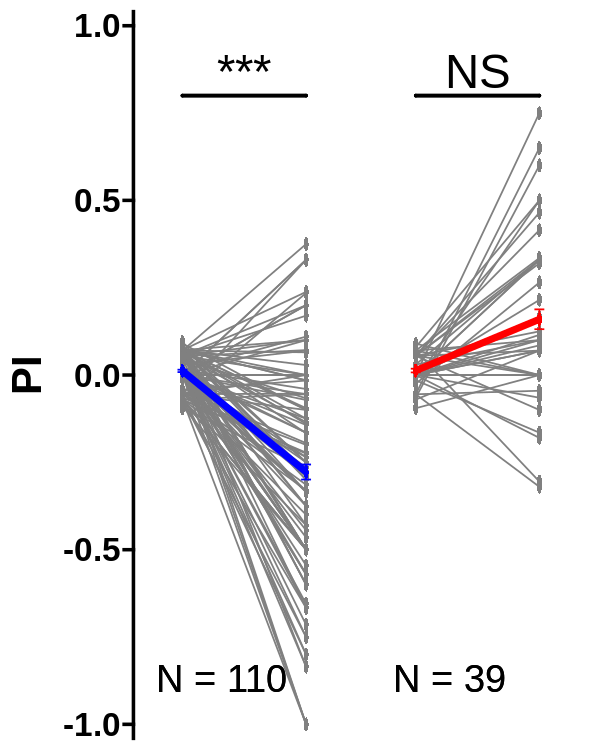

In [59]:
size_unit=2.5
ratio=2.5
panel1A <- learning_plot(
    panel1_data_long, "experiment", direction="horizontal",
    starsize=10, textsize=8,
    hjust_text=0.2, y_annotation=0.8, colors=colors_panel1, y_limits=y_limits_panel1
)
save_learning_plot(plot = panel1A, filename = "figures/panel1A.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1A$n_facets)

panel1A

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2


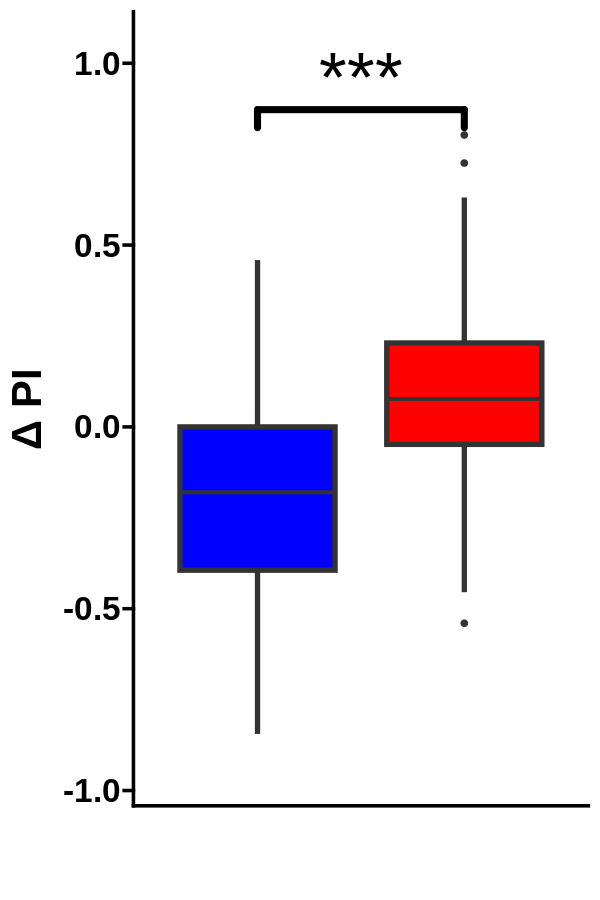

In [12]:
ratio=3
panel1B <- summary_plot(
    panel1_data,
    group = "experiment",
    colors=colors_panel1,
    comparisons=list(c("20min STM", "20min STM unpaired")),
    annotation_y=0.79,
    y_limits=c(-1, 1.1),
    text_y_size=20,
    title_y_size=25
)
panel1B$gg <- panel1B$gg + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) 
save_summ_plot(plot = panel1B, filename = "figures/panel1B.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1B$n_facets)
panel1B